# PREDICTING HEART DISEASE USING MACHINE LEARNING 

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a ML model capable of predicting
whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## Data
for data use following links = "https://archive.ics.uci.edu/dataset/45/heart+disease" and 
"https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data"

The original data came from the Cleavland data from the UCI ML Repository.

There is also a version of it available on kaggle.


## Evaluation 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## Features
This is where you'll get different information about each of the features in your data.

"Create data dictionary"
1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

## Preparing the tools 
we're going to use pandas,Matplotlib and Numpy for data analysis and manipulation. 

In [64]:
!pip install seaborn

In [94]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [66]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows,columns)

(303, 14)

## Data Exploration (exploratory data analyis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) you are trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data? 

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
# Let's find out how many of each class there 1--> have heart disease & 0--> No heart disease
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [69]:
## This is a relatively bounced problem meaning that we have approx equal amount of examples in both the classes 

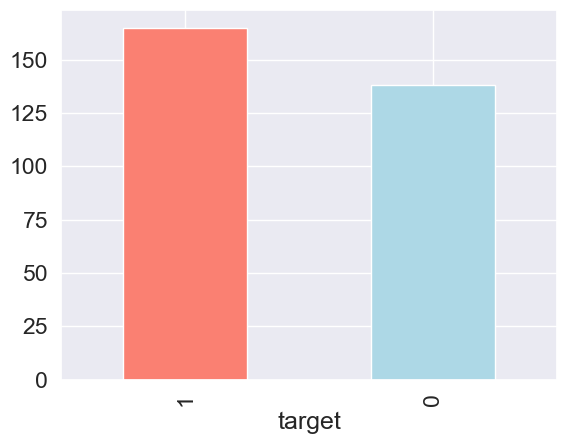

In [106]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);
plt.show()

In [8]:
# to check that whether any column have none value or not and also class of column (int,float etc)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# 2nd method to check are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# compare columns with each other --> help in getting intuition that how the features (the columns) relate to the target variable. 

## Heart Disease Frequency according to Sex

In [12]:
# 1 - males , 0 - females 
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


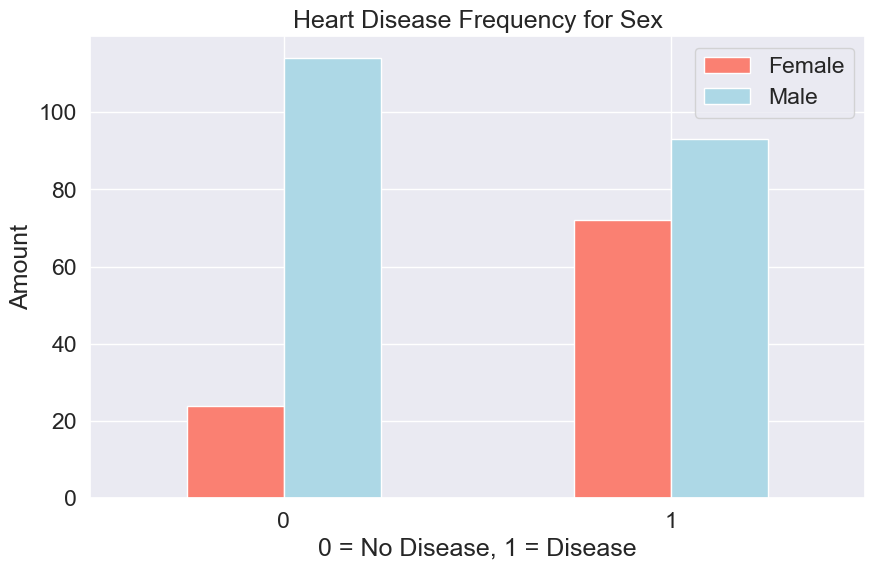

In [107]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show();

In [15]:
df["thalach"].value_counts

<bound method IndexOpsMixin.value_counts of 0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64>

## Age vs Max heart rate (thalach) for Heart Disease

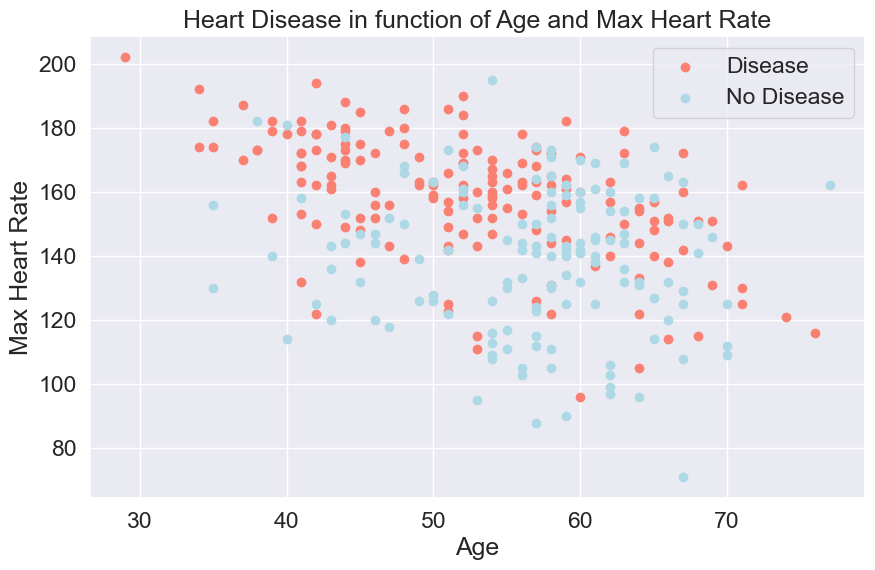

In [108]:
# Create another figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples 
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);
plt.show();

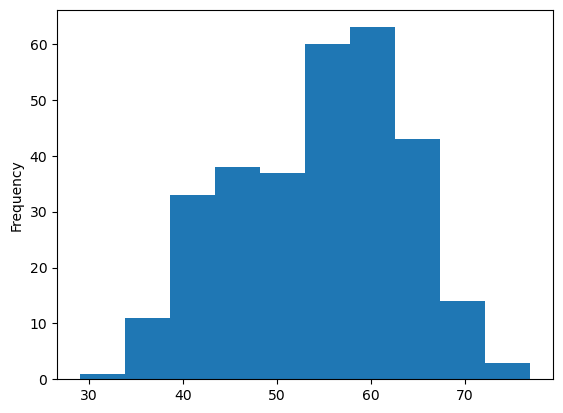

In [98]:
# Check the distribution of thr age column with a histogram
df.age.plot.hist();
plt.show();

## Heart disease frequency per chest pain type
cp - chest pain type
1. 0 : Typical angina - chest pain related decrease blood supply to heart
2. 1 : Atypical angina - chest pain not related to heart
3. 2 : Non-anginal pain - typically esophageal spasms (non heart related)
4. 3 : Asymptomatic - chest pain not showing signs of disease 

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


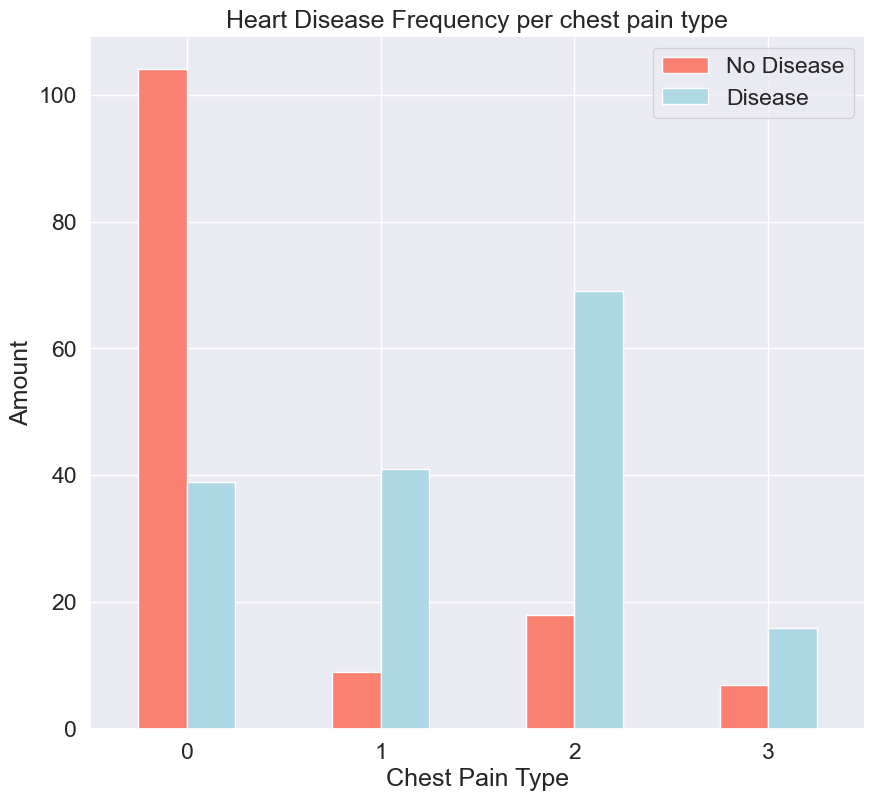

In [109]:
# Make the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,9),
                                 color=["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);
plt.show();

In [79]:
# Make a correlation matrix i.e show relations between columns or compute pairwise coorelation of columns, excluding null values
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [21]:
# Let's make our correlation matrix a little prettier 
corr_matrix = df.corr() # Compute correlation matrix of all numeric columns in the DataFrame

fig,ax = plt.subplots(figsize=(15,10))  # Create a figure and axis with a specific size (15x10 inches)

ax = sns.heatmap(corr_matrix,      # Plot a heatmap of the correlation matrix
                annot=True,        # Display the correlation values in each cell
                linewidths=0.5,    # Add lines between cells for better readability
                fmt=".2f",         # Format the numbers to 2 decimal places
                cmap="YlGnBu");    # Use Yellow-Green-Blue colormap for visual appeal4

bottom, top = ax.get_ylim()              # Get current y-axis limits
ax.set_ylim(bottom + 0.5, top - 0.5)     # Shrink the y-axis range by 0.5 units from both ends

# higher positive value = positive potential correlation 
# higher negative value = negative potential correlation 

(14.5, -0.5)

### Negative correlation = relationship between two variables in which one variable increases as the other decreases

According to the correlation value here, if someone gets chest pain during exercise(exang = 1), their chance of having heart disease goes down (target = 0)

# Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
# Split the Data into X & y
X = df.drop("target",axis=1)
y = df["target"]

In [81]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [82]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [83]:
# Split data into train and test sets 
np.random.seed(42)

# Split into train & test sets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [84]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [85]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

#### now we've got our data split into training and test sets, it's time to build a machine learning model.
We'll train it(find the patterns) on the training sets.
And we'll test it(use the patterns) on the test sets.

### We are going to try 3 different ML models :
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier 

In [86]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),       # Logistic Regression model
    "KNN": KNeighborsClassifier(),                     # K-Nearest Neighbors model
    "Random Forest": RandomForestClassifier()          # Random Forest model
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.

    Parameters:
    models : dict
        A dictionary containing scikit-learn ML models.
    X_train : array-like
        Training features (no labels).
    X_test : array-like
        Testing features (no labels).
    y_train : array-like
        Training labels.
    y_test : array-like
        Testing labels.

    Returns:
    model_scores : dict
        A dictionary of model names and their accuracy scores on test data.
    """

    # Set random seed for reproducibility
    np.random.seed(42)

    # Dictionary to store model accuracy scores
    model_scores = {}

    # Loop through each model in the dictionary
    for name, model in models.items():
        model.fit(X_train, y_train)                 # Train the model on training data
        model_scores[name] = model.score(X_test, y_test)  # Test the model and store its accuracy

    return model_scores  # Return dictionary of model scores

In [87]:
# Call the fit_and_score function by passing in the models and training/testing data

model_scores = fit_and_score(models=models,       # Dictionary of ML models to train and evaluate
                             X_train=X_train,     # Training features (input data)
                             X_test=X_test,       # Testing features (input data)
                             y_train=y_train,     # Training labels (target values)
                             y_test=y_test)       # Testing labels (true target values)

# Output the dictionary of model performance scores (accuracy on test data)
model_scores


C:\Users\KASHISH\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison 

model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do ?? 

# Classification and Regression metrics


1. Classification --> Accuracy , Precision , Recall , F1
2. Regression     --> R^2      , MAE       , MSE    , RMSE 

Let's look at the following : 
1. Hyperparameter tuning
2. Feature importance 
3. Confusion matrix 
4. Cross-Validation 
5. Precision 
6. Recall
7. F1 score
8. Classification report 
9. ROC Curve
10.Area under the curve (AUC)

## Hyperparameter tuning 

In [88]:
# Let's tune KNN 
train_scores = []
test_scores = []

# Creatw a list of different values for n_neighbors 
neighbors = range(1,21)

# setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors 
for i in neighbors : 
    knn.set_params(n_neighbors=i)

    # Fit the algorithm 
    knn.fit(X_train,y_train)

    # Update the training score list 
    train_scores.append(knn.score(X_train,y_train))

    # Update the test score list
    test_scores.append(knn.score(X_test,y_test))

In [89]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [90]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [34]:
# Plotting the training scores for different values of K (number of neighbors)
plt.plot(neighbors, train_scores, label="Train score")

# Plotting the testing scores for different values of K
plt.plot(neighbors, test_scores, label="Test score")

# Setting the x-axis ticks from 1 to 20 with a step of 1 (for number of neighbors)
plt.xticks(np.arange(1, 21, 1))

# Labeling the x-axis to show it's for number of neighbors (K)
plt.xlabel("Number of Neighbors")

# Labeling the y-axis to represent model accuracy score
plt.ylabel("Model Score")

# Adding a legend to differentiate between training and testing score lines
plt.legend()

# Printing the maximum test score achieved, formatted as a percentage with two decimal places
print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

Maximum KNN Score on the test data: 75.41%


## Hyperparameter tuning with RandomizedSearchCV

We're going to tune : 
* LogisticRegression()
* RandomForestClassifier()

.... using RandomizedSearchCV

In [91]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C" : np.logspace(-4, 4, 20),  # 'C' is the inverse of regularization strength. Lower values = stronger regularization.
    "solver" : ["liblinear"]       # 'liblinear' is a solver suitable for small datasets and binary classification.
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators" : np.arange(10, 1000, 50),         # Number of trees in the forest, tested from 10 to 950 in steps of 50.
    "max_depth" : [None, 3, 5, 10],                   # Maximum depth of each tree; None means the nodes expand until pure or min_samples is reached.
    "min_samples_split" : np.arange(2, 20, 2),        # Minimum number of samples required to split an internal node.
    
    # Minimum number of samples required to be at a leaf node.
    # Higher values help prevent the model from learning overly specific patterns (overfitting).
    "min_samples_leaf" : np.arange(1, 20, 2)          
}


Now we have got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV....

In [36]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Set up random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(
    estimator=LogisticRegression(),        # Model to tune
    param_distributions=log_reg_grid,      # Hyperparameter grid to sample from
    cv=5,                                  # 5-fold cross-validation
    n_iter=20,                             # Try 20 different combinations
    verbose=True                           # Print progress during search
)

# Fit the random search model using training data
rs_log_reg.fit(X_train, y_train)           # Train the model with randomized hyperparameter combinations

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [38]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogesticRegression(), let's do the same for RandomForestClassifier()....

In [51]:
# Set up the random seed to ensure reproducibility of results
np.random.seed(42)

# Set up a random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),     # Base model: Random Forest classifier
    param_distributions=rf_grid,  # Dictionary of hyperparameters to try (you must define rf_grid before this)
    cv=5,                         # 5-fold cross-validation to evaluate performance
    n_iter=20,                    # Try 20 random combinations of hyperparameters
    verbose=True                  # Print progress during search
)

# Fit the random search model to the training data
rs_rf.fit(X_train, y_train)       # Train on X_train and y_train to find the best hyperparameters


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
# Find the best hyperparameter 
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [58]:
# Eavluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [59]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Hyperparameter tuning with GridSearchCV

since our LogisticRegression model provides the best scores so far, we'll try and improve them using again using GridSeacrhCV...

In [60]:
# Define a dictionary of hyperparameters to search for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),       # Try 20 values for 'C' (inverse of regularization strength) from 10^-4 to 10^4
    "solver": ["liblinear"]           # Use 'liblinear' solver (suitable for small datasets and binary classification)
}

# Set up a grid search to find the best hyperparameters for LogisticRegression
gs_log_reg = GridSearchCV(
    LogisticRegression(),             # Base model: Logistic Regression
    param_grid=log_reg_grid,         # Dictionary of hyperparameters to search
    cv=5,                             # Use 5-fold cross-validation to evaluate each combination
    verbose=True                      # Print progress messages during search
)

# Fit the grid search model to the training data
gs_log_reg.fit(X_train, y_train)     # Train on X_train and y_train to find the best hyperparameter combination

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [61]:
# check the best hyperparameter 
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [62]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned ML classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion Matrix 
* Classification Report 
* Precision 
* Recall 
* F1 Score 

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [72]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

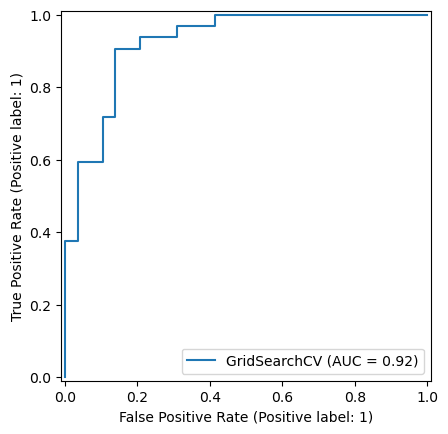

In [97]:
# Plot ROC curve and calculate and calculate AUC metric 
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show();

In [99]:
# Confusion matrix 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


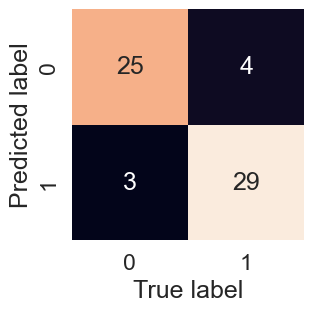

In [105]:
# Set the font scale for seaborn plots to make text more readable
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nicely formatted confusion matrix using seaborn's heatmap().
    
    Parameters:
    - y_test: Actual target values
    - y_preds: Predicted target values
    """
    
    # Create a new figure and axes with a specified size
    fig, ax = plt.subplots(figsize=(3, 3))
    
    # Generate and display the confusion matrix as a heatmap
    # 'annot=True' adds the numbers in each cell
    # 'cbar=False' removes the color bar for simplicity
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    # Label the axes for clarity
    plt.xlabel("True label")      # X-axis: true classes
    plt.ylabel("Predicted label") # Y-axis: predicted classes

# Call the function to plot the confusion matrix
plot_conf_mat(y_test, y_preds)

# Display the plot
plt.show()

Now we've got a ROC Curvean AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision. recall and F1 score.

In [110]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation 

we're going to calculate accuracy,precision,recall and F1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [111]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [112]:
# Create a new classifier with best parameters.
clf = LogisticRegression(C = 0.23357214690901212,
                        solver = 'liblinear')

In [113]:
# Cross-validated accuracy 
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [116]:
cv_acc = np.mean([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])
cv_acc

np.float64(0.84797814)

In [117]:
# cross-validation precision 
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [118]:
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [119]:
# Cross-validated recall 
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [120]:
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [121]:
# cross-validated F1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [122]:
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

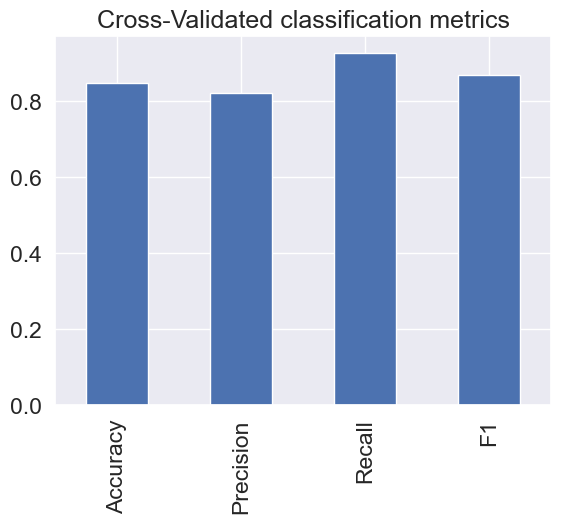

In [129]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                         "Precision" : cv_precision,
                         "Recall" : cv_recall,
                         "F1" : cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated classification metrics",
                     legend = False)
plt.show();

## Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [131]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [132]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [135]:
# Check coef_
clf.coef_ 

# shows how important each feature is in predicting the output.
# Positive value → feature increases the prediction.
# Negative value → feature decreases the prediction.
# Zero or near zero → feature has little to no effect.


array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [137]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

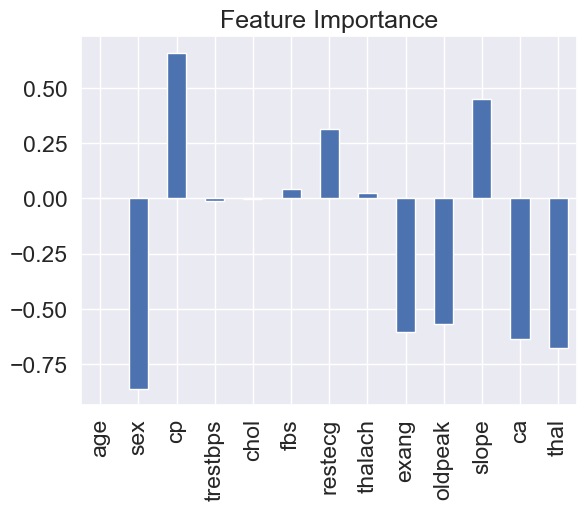

In [140]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show();

In [142]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [144]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


 slope is the "slope of the peak exercise ST segment" where:
 
 • 0: Upsloping: better heart rate with excercise (uncommon)
 • 1: Flatsloping: minimal change (typical healthy heart)
 • 2: Downslopins: signs of unhealthy heart